In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import subprocess as sp
from shapely import wkt
import seaborn as sns

In [2]:
sns.set()

# ++++++++++++++++++++++++++++++++++++++++++++++++


# ++++++++++++++++++++++++++++++++++++++++++++++++

In [3]:
corona_df = pd.read_csv('edited_master.csv')

In [4]:
corona_df.head()

,Country,Date,Confirmed,Deaths,Recovered,Active,geometry,log_Confirmed,log_Deaths
0,Aruba,2020-01-22 00:00:00,0.0,0.0,0.0,0.0,"POLYGON ((-69.8822326660156 12.4111099243165, ...",0.0,0.0
1,Aruba,2020-01-23 00:00:00,0.0,0.0,0.0,0.0,"POLYGON ((-69.8822326660156 12.4111099243165, ...",0.0,0.0
2,Aruba,2020-01-24 00:00:00,0.0,0.0,0.0,0.0,"POLYGON ((-69.8822326660156 12.4111099243165, ...",0.0,0.0
3,Aruba,2020-01-25 00:00:00,0.0,0.0,0.0,0.0,"POLYGON ((-69.8822326660156 12.4111099243165, ...",0.0,0.0
4,Aruba,2020-01-26 00:00:00,0.0,0.0,0.0,0.0,"POLYGON ((-69.8822326660156 12.4111099243165, ...",0.0,0.0


In [6]:
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
Country          22750 non-null object
Date             22750 non-null object
Confirmed        22750 non-null float64
Deaths           22750 non-null float64
Recovered        22750 non-null float64
Active           22750 non-null float64
geometry         22750 non-null object
log_Confirmed    22750 non-null float64
log_Deaths       22750 non-null float64
dtypes: float64(6), object(3)
memory usage: 1.6+ MB


In [12]:
corona_df['Date'] = pd.to_datetime(corona_df['Date'])

In [10]:
corona_df['geometry'] = corona_df['geometry'].apply(wkt.loads)

In [13]:
geometry = corona_df.geometry
crs = {'init': 'epsg:4326'}
corona_df = gpd.GeoDataFrame(corona_df, crs=crs, geometry=geometry)
corona_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
Country          22750 non-null object
Date             22750 non-null datetime64[ns]
Confirmed        22750 non-null float64
Deaths           22750 non-null float64
Recovered        22750 non-null float64
Active           22750 non-null float64
geometry         22750 non-null geometry
log_Confirmed    22750 non-null float64
log_Deaths       22750 non-null float64
dtypes: datetime64[ns](1), float64(6), geometry(1), object(1)
memory usage: 1.6+ MB


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


# ++++++++++++++++++++++++++++++++++++++++++++++++


# ++++++++++++++++++++++++++++++++++++++++++++++++

In [5]:
date_list = pd.read_csv('date_list.csv')
date_list.head()

,Date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [6]:
date_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 1 columns):
Date    83 non-null object
dtypes: object(1)
memory usage: 792.0+ bytes


In [7]:
# date_list.Date = pd.to_datetime(date_list.Date)
# date_list.info()

In [8]:
date_list = date_list.loc[date_list.Date <= '2020-04-13']
date_list.reset_index(drop=True, inplace=True)
date_list.head()

,Date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [9]:
date_list.to_csv('date_list.csv', encoding='utf-8', index=False)

In [10]:
print(date_list.loc[date_list.Date == '2020-01-22'])
print(date_list.loc[date_list.Date == '2020-02-20'])
print(date_list.loc[date_list.Date == '2020-03-20'])
print(date_list.loc[date_list.Date == '2020-04-12'])

         Date
0  2020-01-22
          Date
29  2020-02-20
          Date
58  2020-03-20
          Date
81  2020-04-12


In [11]:
# date_list_test = date_list.iloc[[0]]
date_list_test = date_list.iloc[[0, 29, 58, 81]]

In [12]:
date_list_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 81
Data columns (total 1 columns):
Date    4 non-null object
dtypes: object(1)
memory usage: 64.0+ bytes


In [13]:
date_list_test.reset_index(drop=True, inplace=True)
date_list_test.head()

,Date
0,2020-01-22
1,2020-02-20
2,2020-03-20
3,2020-04-12


# ++++++++++++++++++++++++++++++++++++++++++++++++


# ++++++++++++++++++++++++++++++++++++++++++++++++

In [21]:
twitter = pd.read_csv('others/Twitter_no_of_tweets_by_Hashtags_cumsum.csv')
twitter.head()

,Date,#Coronavirus,#covid,#ncov19,#ncov2019,#virus
0,2020-01-22,7468,0,0,0,5662
1,2020-01-23,41496,0,0,0,29297
2,2020-01-24,82183,0,0,0,56540
3,2020-01-25,122925,0,0,0,92634
4,2020-01-26,165510,0,0,0,134705


In [22]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
Date            83 non-null object
#Coronavirus    83 non-null int64
#covid          83 non-null int64
#ncov19         83 non-null int64
#ncov2019       83 non-null int64
#virus          83 non-null int64
dtypes: int64(5), object(1)
memory usage: 4.0+ KB


In [23]:
twitter.columns

Index(['Date', '#Coronavirus', '#covid', '#ncov19', '#ncov2019', '#virus'], dtype='object')

In [24]:
twitter.set_index('Date', inplace=True)
twitter.head()

,#Coronavirus,#covid,#ncov19,#ncov2019,#virus
Date,,,,,
2020-01-22,7468,0,0,0,5662
2020-01-23,41496,0,0,0,29297
2020-01-24,82183,0,0,0,56540
2020-01-25,122925,0,0,0,92634
2020-01-26,165510,0,0,0,134705


In [25]:
stacked = pd.DataFrame(twitter.stack(dropna=False))
stacked.head()

0
Date                         
2020-01-22 #Coronavirus  7468
           #covid           0
           #ncov19          0
           #ncov2019        0
           #virus        5662

In [26]:
stacked.reset_index(inplace=True)
stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 3 columns):
Date       415 non-null object
level_1    415 non-null object
0          415 non-null int64
dtypes: int64(1), object(2)
memory usage: 9.9+ KB


In [27]:
stacked.columns

Index(['Date', 'level_1', 0], dtype='object')

In [28]:
stacked.rename(columns = {'level_1':'Hashtags',
                          0:'no_of_mentions'
                         }, 
               inplace = True)
stacked.head()

,Date,Hashtags,no_of_mentions
0,2020-01-22,#Coronavirus,7468
1,2020-01-22,#covid,0
2,2020-01-22,#ncov19,0
3,2020-01-22,#ncov2019,0
4,2020-01-22,#virus,5662


In [29]:
stacked['log10_mentions'] = np.log10(stacked.no_of_mentions)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
stacked['log10_mentions'].min()

-inf

In [31]:
stacked.log10_mentions[stacked.log10_mentions < 0] = 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
stacked['log10_mentions'].min()

0.0

In [33]:
stacked['log10_mentions'].max()

7.3090569889947385

In [34]:
stacked.to_csv('TWITTER.csv', encoding='utf-8', index=False)

In [35]:
stacked.Date = pd.to_datetime(stacked.Date)
stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 4 columns):
Date              415 non-null datetime64[ns]
Hashtags          415 non-null object
no_of_mentions    415 non-null int64
log10_mentions    415 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 13.1+ KB


In [36]:
selected_date_twitter = stacked.loc[stacked.Date == '2020-04-13']
selected_date_twitter

,Date,Hashtags,no_of_mentions,log10_mentions
410,2020-04-13,#Coronavirus,20373094,7.309057
411,2020-04-13,#covid,17799752,7.250414
412,2020-04-13,#ncov19,79996,4.903068
413,2020-04-13,#ncov2019,82505,4.916480
414,2020-04-13,#virus,19644966,7.293251


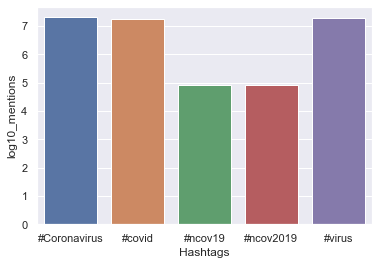

In [37]:
sns.barplot(x="Hashtags", y="log10_mentions", data=selected_date_twitter);

In [38]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 2020-01-22 to 2020-04-13
Data columns (total 5 columns):
#Coronavirus    83 non-null int64
#covid          83 non-null int64
#ncov19         83 non-null int64
#ncov2019       83 non-null int64
#virus          83 non-null int64
dtypes: int64(5)
memory usage: 6.4+ KB


# ++++++++++++++++++++++++++++++++++++++++++++++++


# ++++++++++++++++++++++++++++++++++++++++++++++++

In [309]:
reddit = pd.read_csv("others/Reddit_Dataset_with_cumsum_log.csv", parse_dates=['Date'], dayfirst=True)
reddit.head()

,Date,Contro_Posts,Avg _comments,Avg_votes,Avg_posts
0,2020-01-20,0.000000,3.003461,3.733037,0.698970
1,2020-01-21,0.301030,3.446848,4.463609,1.255273
2,2020-01-22,0.477121,3.718502,4.638040,1.380211
3,2020-01-23,0.698970,3.762078,4.827563,1.826075
4,2020-01-24,0.845098,3.916559,4.906691,1.857332


In [310]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
Date             95 non-null datetime64[ns]
Contro_Posts     95 non-null float64
Avg _comments    95 non-null float64
Avg_votes        95 non-null float64
Avg_posts        95 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.8 KB


In [311]:
reddit.columns

Index(['Date', 'Contro_Posts', 'Avg _comments', 'Avg_votes', 'Avg_posts'], dtype='object')

In [312]:
reddit.set_index('Date', inplace=True)
reddit.head()

,Contro_Posts,Avg _comments,Avg_votes,Avg_posts
Date,,,,
2020-01-20,0.000000,3.003461,3.733037,0.698970
2020-01-21,0.301030,3.446848,4.463609,1.255273
2020-01-22,0.477121,3.718502,4.638040,1.380211
2020-01-23,0.698970,3.762078,4.827563,1.826075
2020-01-24,0.845098,3.916559,4.906691,1.857332


In [313]:
reddit.rename(columns = {'Contro_Posts':'Contro Posts',
                         'Avg _comments':'Avg Comments/Post',
                         'Avg_votes':'Avg Votes/Post',
                         'Avg_posts':'Avg Posts/Day'                         
                         }, 
               inplace = True)

In [314]:
reddit_stacked = pd.DataFrame(reddit.stack(dropna=False))
reddit_stacked.head()

0
Date                                  
2020-01-20 Contro Posts       0.000000
           Avg Comments/Post  3.003461
           Avg Votes/Post     3.733037
           Avg Posts/Day      0.698970
2020-01-21 Contro Posts       0.301030

In [315]:
reddit_stacked.reset_index(inplace=True)
reddit_stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
Date       380 non-null datetime64[ns]
level_1    380 non-null object
0          380 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 9.0+ KB


In [316]:
reddit_stacked.columns

Index(['Date', 'level_1', 0], dtype='object')

In [317]:
reddit_stacked.rename(columns = {'level_1':'Categories',
                          0:'log10_mentions'
                         }, 
               inplace = True)
reddit_stacked.head()

,Date,Categories,log10_mentions
0,2020-01-20,Contro Posts,0.000000
1,2020-01-20,Avg Comments/Post,3.003461
2,2020-01-20,Avg Votes/Post,3.733037
3,2020-01-20,Avg Posts/Day,0.698970
4,2020-01-21,Contro Posts,0.301030


In [318]:
reddit_stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
Date              380 non-null datetime64[ns]
Categories        380 non-null object
log10_mentions    380 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 9.0+ KB


In [319]:
selected_date_reddit = reddit_stacked.loc[reddit_stacked.Date == '2020-04-13']
selected_date_reddit

,Date,Categories,log10_mentions
336,2020-04-13,Contro Posts,4.201069
337,2020-04-13,Avg Comments/Post,4.744801
338,2020-04-13,Avg Votes/Post,5.811492
339,2020-04-13,Avg Posts/Day,3.189771


In [321]:
reddit_stacked.to_csv('REDDIT.csv', encoding='utf-8', index=False)

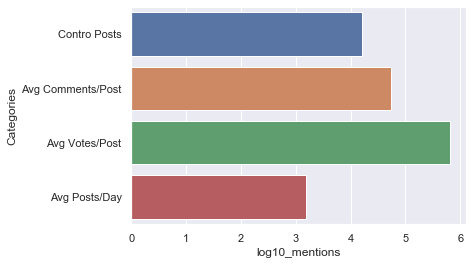

In [320]:
sns.barplot(x="log10_mentions", y="Categories", data = selected_date_reddit);

# ++++++++++++++++++++++++++++++++++++++++++++++++


# ++++++++++++++++++++++++++++++++++++++++++++++++

In [177]:
stock = pd.read_csv("others/StockMarketV1.csv", parse_dates=['date_time'], dayfirst=True)
stock.head()

,date_time,gm_open,gm_close,johnson_open,johnson_close,jacobs_open,jacobs_close,albemarle_open,albemarle_close,disney_open,disney_close,att_open,att_close,aa_open,aa_close
0,2019-10-28,37.21,36.64,128.62,129.18,94.33,94.41,62.75,63.74,131.45,130.53,38.30,38.49,31.00,31.36
1,2019-10-29,37.60,38.21,129.70,129.12,93.80,94.29,63.45,63.03,130.50,129.48,38.49,38.06,31.42,30.92
2,2019-10-30,38.26,37.91,133.30,132.84,94.48,94.84,62.86,62.67,129.69,129.60,38.39,38.20,30.77,30.29
3,2019-10-31,37.62,37.16,132.38,132.04,94.53,93.58,62.31,60.74,129.53,129.92,38.21,38.49,30.07,30.06
4,2019-11-01,37.21,37.97,132.05,131.20,94.25,96.07,61.46,64.49,130.99,132.75,38.95,38.95,30.30,30.56


In [179]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 15 columns):
date_time          179 non-null datetime64[ns]
gm_open            179 non-null float64
gm_close           179 non-null float64
johnson_open       179 non-null float64
johnson_close      179 non-null float64
jacobs_open        179 non-null float64
jacobs_close       179 non-null float64
albemarle_open     179 non-null float64
albemarle_close    179 non-null float64
disney_open        179 non-null float64
disney_close       179 non-null float64
att_open           179 non-null float64
att_close          179 non-null float64
aa_open            179 non-null float64
aa_close           179 non-null float64
dtypes: datetime64[ns](1), float64(14)
memory usage: 21.1 KB


In [181]:
stock.rename(columns = {'date_time':'Date'
                       }, 
             inplace = True)

In [187]:
stock.columns

Index(['Date', 'gm_open', 'gm_close', 'johnson_open', 'johnson_close',
       'jacobs_open', 'jacobs_close', 'albemarle_open', 'albemarle_close',
       'disney_open', 'disney_close', 'att_open', 'att_close', 'aa_open',
       'aa_close'],
      dtype='object')

In [192]:
stock_open = stock[['Date', 'gm_open', 'johnson_open', 'jacobs_open', 
                        'albemarle_open', 'disney_open', 'att_open', 'aa_open']]

In [193]:
stock_selected = stock_open.loc[stock_open.Date == '2020-04-20']

In [195]:
stock_selected

,Date,gm_open,johnson_open,jacobs_open,albemarle_open,disney_open,att_open,aa_open
175,2020-04-20,21.72,150.93,83.7,60.0,103.58,30.85,11.15


In [326]:
stock_open.rename(columns = {'gm_open':'GM',
                             'johnson_open':'JHN',
                             'jacobs_open':'JCB',
                             'albemarle_open':'ALB',
                             'disney_open':'DSN',
                             'att_open':'ATT',
                             'aa_open':'AA'
                         }, 
               inplace = True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [331]:
stock_open.head()

,Date,GM,JHN,JCB,ALB,DSN,ATT,AA
0,2019-10-28,37.21,128.62,94.33,62.75,131.45,38.30,31.00
1,2019-10-29,37.60,129.70,93.80,63.45,130.50,38.49,31.42
2,2019-10-30,38.26,133.30,94.48,62.86,129.69,38.39,30.77
3,2019-10-31,37.62,132.38,94.53,62.31,129.53,38.21,30.07
4,2019-11-01,37.21,132.05,94.25,61.46,130.99,38.95,30.30


In [334]:
stock_open = stock_open.loc[stock_open.Date >= '2020-01-01']
stock_open.reset_index(drop=True, inplace=True)
stock_open.head()

,Date,GM,JHN,JCB,ALB,DSN,ATT,AA
0,2020-01-01,36.37,145.10,89.70,71.61,143.67,39.01,28.20
1,2020-01-02,37.00,145.87,89.90,73.50,145.29,39.16,28.98
2,2020-01-03,36.73,143.50,89.13,71.41,146.40,38.58,28.27
3,2020-01-04,36.73,143.50,89.13,71.41,146.40,38.58,28.27
4,2020-01-05,36.73,143.50,89.13,71.41,146.40,38.58,28.27


In [335]:
stock_open.to_csv('STOCK_MARKET.csv', encoding='utf-8', index=False)

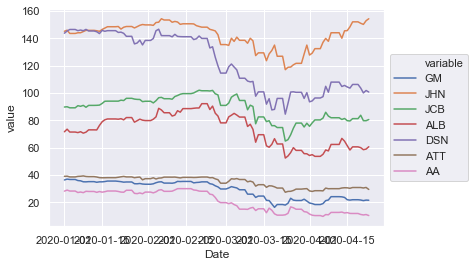

In [336]:
# sns.relplot(x="Date", y="gm_open", kind="line", data=stock)
# sns.relplot(x="Date", y="johnson_open", kind="line", data=stock)
sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(stock_open, ['Date']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [328]:
stock_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 175 to 175
Data columns (total 8 columns):
Date              1 non-null datetime64[ns]
gm_open           1 non-null float64
johnson_open      1 non-null float64
jacobs_open       1 non-null float64
albemarle_open    1 non-null float64
disney_open       1 non-null float64
att_open          1 non-null float64
aa_open           1 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 72.0 bytes


# ++++++++++++++++++++++++++++++++++++++++++++++++


# ++++++++++++++++++++++++++++++++++++++++++++++++

In [329]:
stock_open.head()

,Date,GM,JHN,JCB,ALB,DSN,ATT,AA
0,2019-10-28,37.21,128.62,94.33,62.75,131.45,38.30,31.00
1,2019-10-29,37.60,129.70,93.80,63.45,130.50,38.49,31.42
2,2019-10-30,38.26,133.30,94.48,62.86,129.69,38.39,30.77
3,2019-10-31,37.62,132.38,94.53,62.31,129.53,38.21,30.07
4,2019-11-01,37.21,132.05,94.25,61.46,130.99,38.95,30.30


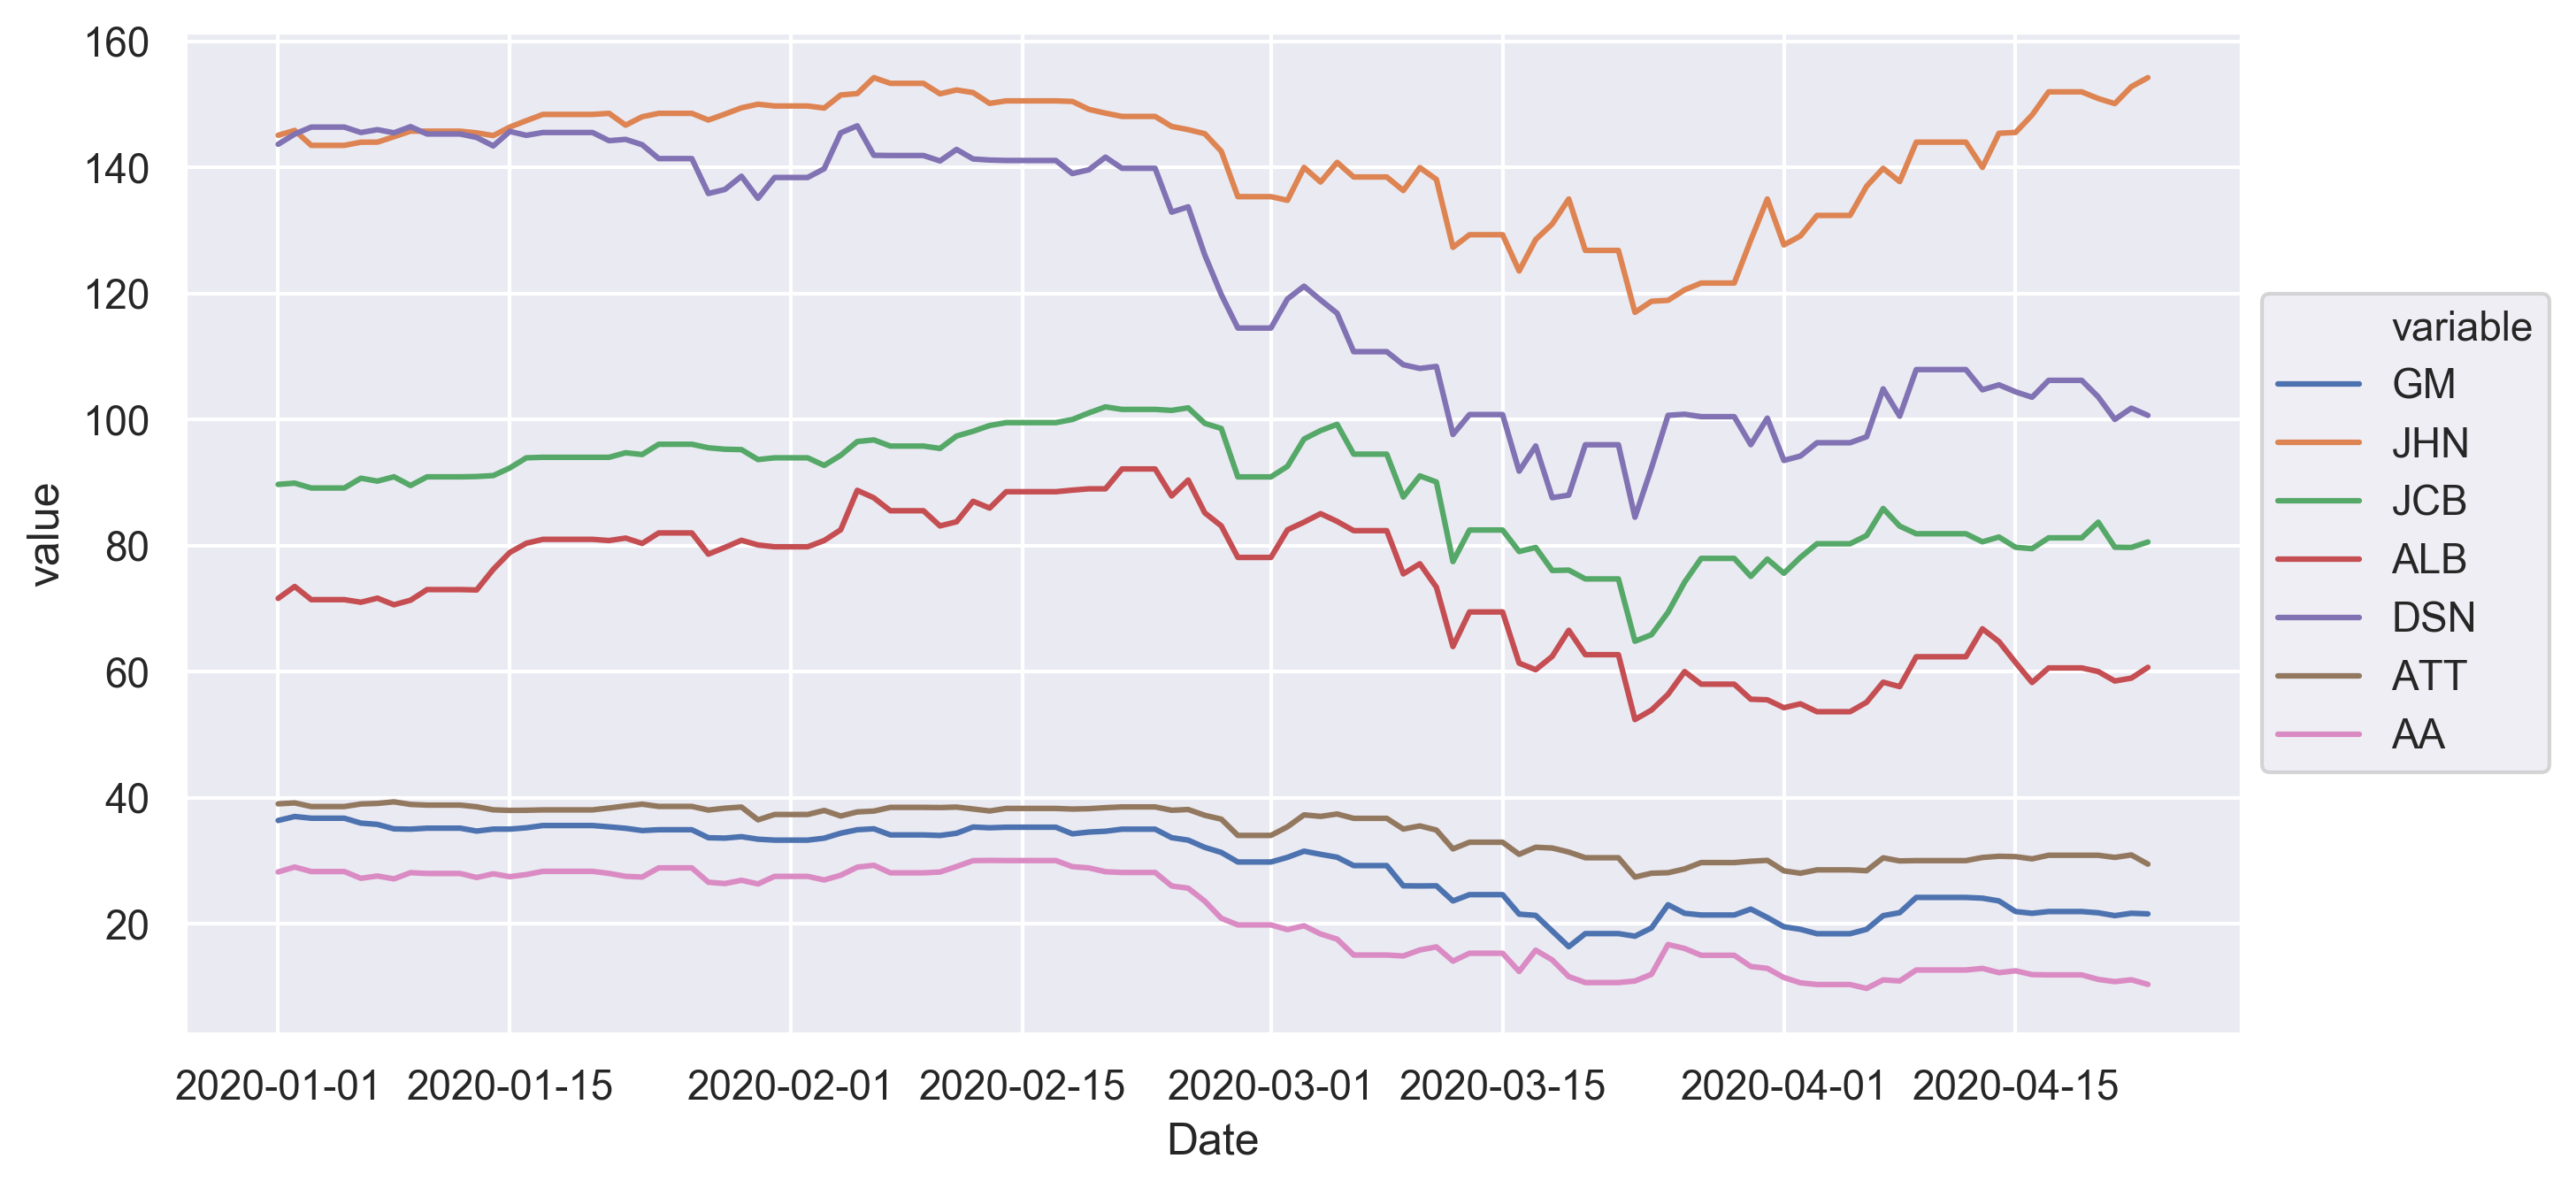

In [355]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(stock_open, ['Date']), ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [261]:
my_dates = ['2019-11-20', '2019-12-20', '2020-01-20', '2020-02-20', '2020-03-20']

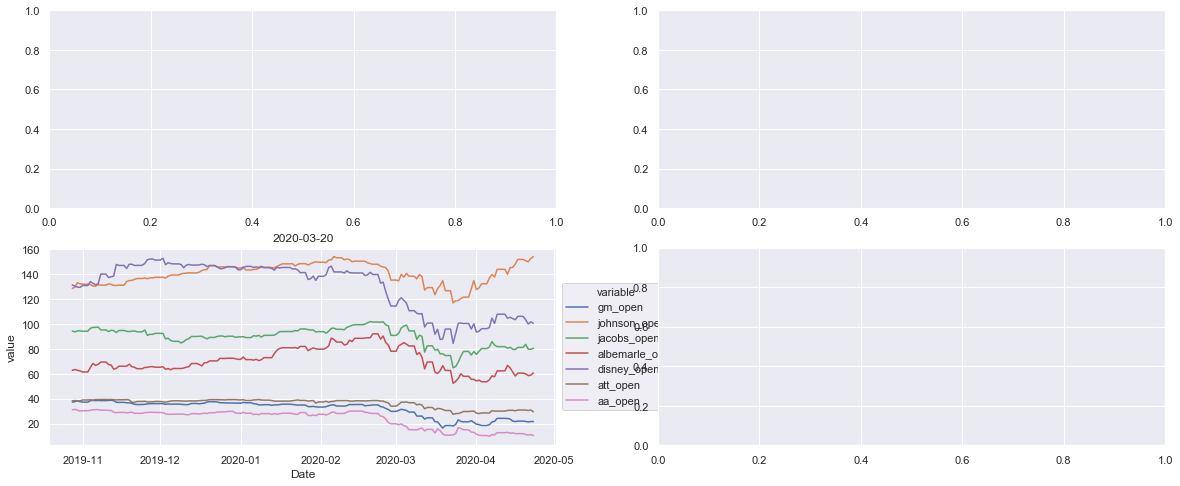

In [303]:
plot_no = 0
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(stock_open, ['Date']), ax=ax3)
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in range(len(my_dates)):
    my_selected_date = my_dates[i]
    line=ax3.axvline(my_selected_date)
    ax3.set_title(str(my_selected_date))
    fig.savefig('output_images/stock_image_{plot_no:04d}.png'.format(plot_no=plot_no))
    file = pathlib.Path("output_images/stock_image_{plot_no:04d}.png")
#     plt.pause(0.1)  # added
    line.remove()   # added
    plot_no += 1


In [353]:
stock_open_columns = ['GM', 'JHN', 'JCB', 'ALB', 'DSN', 'ATT', 'AA']

In [352]:
stock_open.columns

Index(['Date', 'GM', 'JHN', 'JCB', 'ALB', 'DSN', 'ATT', 'AA'], dtype='object')

# ++++++++++++++++++++++++++++++++++++++++++++++++


# ++++++++++++++++++++++++++++++++++++++++++++++++

In [25]:
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

In [ ]:
path = 'output_images/'
image_no = 0
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(25, 17), dpi=300)

ax1_min, ax1_max = 0.0, reddit_stacked.log10_mentions.max()
ax2_min, ax2_max = 0.0, stacked.log10_mentions.max()

vmin, vmax = 0, corona_df.log_Confirmed[corona_df.Date == '2020-04-21'].max()
variable = 'log_Confirmed'
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, ax = ax4, orientation = 'vertical', shrink=0.6, pad=0.02)

ax1.set_title("REDDIT\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)
ax2.set_title("TWITTER\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)
ax3.set_title("\nSTOCK MARKET\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)
ax4.set_title("\nlog(CONFIRMED CASES) - COVID 19\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)

ax1.set_xlim([ax1_min, ax1_max])
ax2.set_ylim([ax2_min, ax2_max])

sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(stock_open, ['Date']), ax=ax3)
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=stock_columns)



for i in range(0, len(date_list_test)):   
    date_for_mask = date_list_test.Date.values[i]
    
    mask_twitter = (stacked['Date'] == date_for_mask)
    mask_reddit = (reddit_stacked['Date'] == date_for_mask)
    mask_stock = (stock_open['Date'] == date_for_mask)
    mask_map = (corona_df['Date'] == date_for_mask)
    
    my_reddit = reddit_stacked.loc[mask_reddit]
    my_twitter = stacked.loc[mask_twitter]
    my_stock = stock_open.loc[mask_stock]
    my_map = corona_df.loc[mask_map]
    
    sns.barplot(x="log10_mentions", y="Categories", data = my_reddit, ax=ax1)    
    ax1.set_ylabel('Categories', fontdict = {'fontsize': 18, 'fontweight' : 3})
    ax1.set_xlabel('log [Number of Mentions] (Cumulative)', fontdict = {'fontsize': 18, 'fontweight' : 3})
    
    sns.barplot(x="Hashtags", y="log10_mentions", data = my_twitter, ax=ax2)
    ax2.set_ylabel('log [Number of Mentions] (Cumulative)', fontdict = {'fontsize': 18, 'fontweight' : 3})
    ax2.set_xlabel('Hashtags', fontdict = {'fontsize': 18, 'fontweight' : 3})
    
    ax3_vline = ax3.axvline(date_for_mask, c='k', lw=2.0)
    ax3.set_ylabel('Stock Value', fontdict = {'fontsize': 18, 'fontweight' : 3})
    ax3.set_xlabel('Date', fontdict = {'fontsize': 18, 'fontweight' : 3})
    
    ax4.get_xaxis().set_visible(False)
    ax4.get_yaxis().set_visible(False)
    ax4.axis('equal')
    fig.suptitle(str(date_for_mask), fontsize= 30, fontweight= 10, x=0.51, y=0.5)
    my_map.plot(column=variable, cmap='OrRd', 
                linewidth=0.8, ax=ax4, edgecolor='0.8', figsize=(30,20)
                )
#     plt.tight_layout()
    fig.savefig(os.path.join(path, 'image_{image_no:04d}.png'.format(image_no=image_no)), 
                dpi=300, bbox_inches='tight')
    ax3_vline.remove()
    image_no +=1

In [ ]:
fontdict = {'fontsize': , 'fontweight' : }

In [223]:
str(date_list_test.Date.values[0])

'2020-01-22'

# ++++++++++++++++++++++++++++++++++++++++++++++++


# ++++++++++++++++++++++++++++++++++++++++++++++++

In [306]:
# Making a video out of all the images
images_path = "output_images/"
print(os.path.isdir(images_path))
os.system("ffmpeg -f image2 -r 1 -s 1024x768 -i output_images/image_%04d.png -vcodec mpeg4 -y output_images/video.mp4")

True


0

In [ ]:
images_path = "output_images/"
sp.call([
        'ffmpeg',
        '-y',
        '-r', '2',           #frame rate: 1/5 for 5 images in 1 sec, 5 for 1 image for 5 secs. 1 for 1 image for 1 sec
        '-f', 'image2',
        '-s', '1024x768',
        '-i', os.path.join(images_path, 'image_%04d.png'),
        '-vcodec', 'libx264',
        '-crf',  '25',
        '-pix_fmt', 'yuv420p',
        os.path.join(images_path, 'video.mp4')
    ])